In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
# reading data
df = pd.read_csv('../github/hidden_features_df.csv', index_col="Unnamed: 0")
#df = pd.read_csv('hidden_features_df.csv', index_col="Unnamed: 0")

In [49]:
# showing 5 first registers
df.head(5) 

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,8,0.0,11.246423,0.0,7.995950,9.410959,19.745337,9.010060,8.527996,10.110795,19.589340
1,8,0.0,13.312637,0.0,10.743755,11.378502,18.715256,11.810072,11.065614,12.528616,18.708977
2,5,0.0,0.000000,0.0,0.000000,0.000000,28.648830,0.000000,0.000000,0.000000,30.524609
3,5,0.0,0.000000,0.0,0.000000,0.000000,26.991035,0.000000,0.000000,0.000000,29.041384
4,8,0.0,5.038842,0.0,5.323320,5.368689,22.266983,4.806798,4.124915,4.903548,23.818264


In [50]:
# checking if feature_1 and feature_3 have all zeros
counts_feature1 = df.groupby('feature_1')['feature_1'].value_counts()
print(counts_feature1)

counts_feature3 = df.groupby('feature_3')['feature_3'].value_counts()
print(counts_feature3)

feature_1  feature_1
0.0        0.0          9370
Name: feature_1, dtype: int64
feature_3  feature_3
0.0        0.0          9370
Name: feature_3, dtype: int64


In [51]:
# dropping feature_1 and feature_3
df = df.drop(['feature_1', 'feature_3'], axis=1)

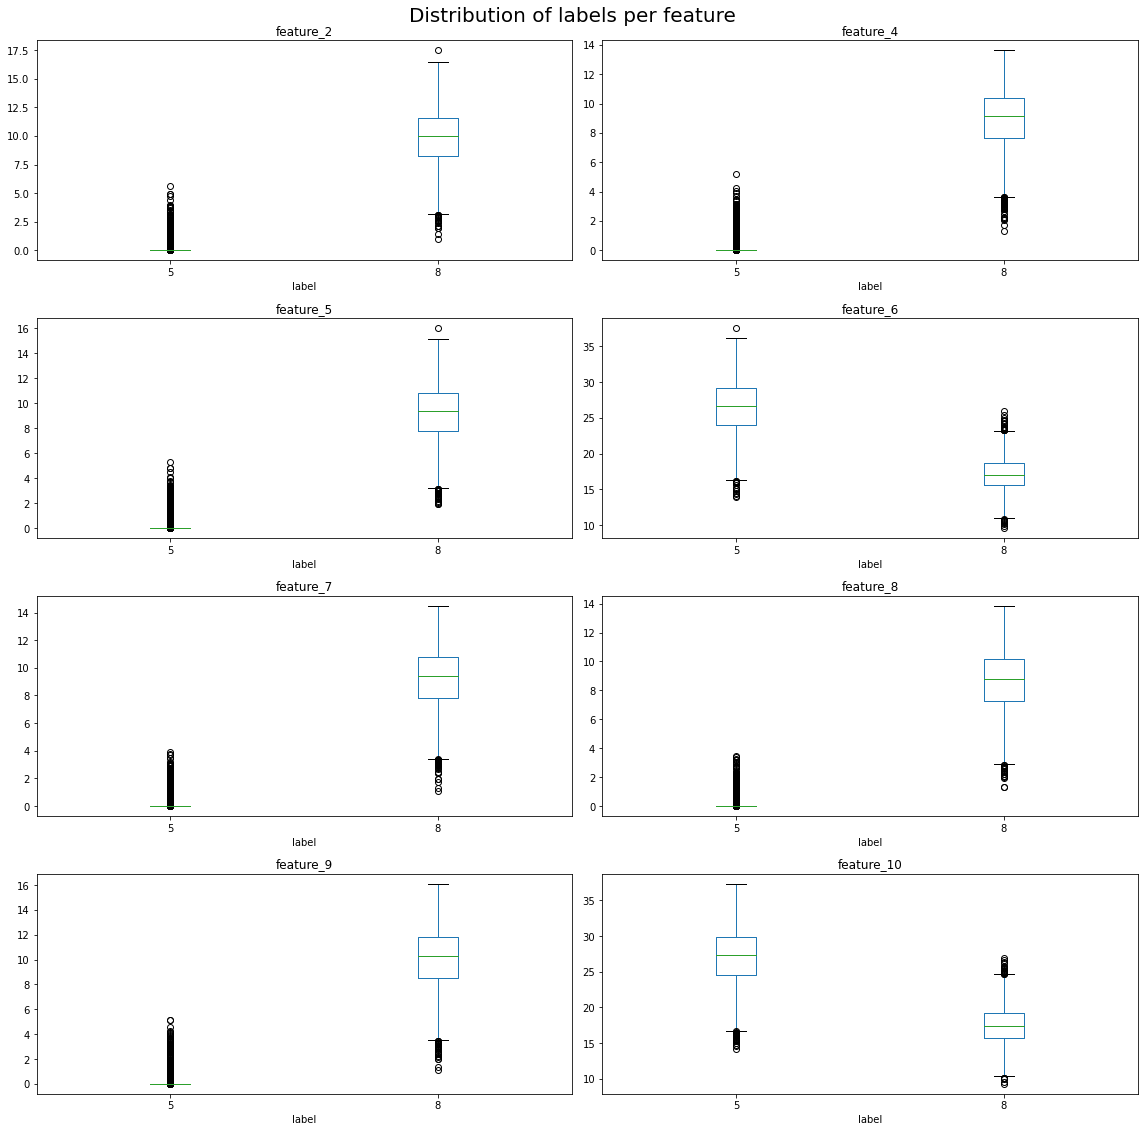

In [52]:
# plotting the distribution for features_2, ..., features_10
feature_cols = ['feature_2', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,16))

for i, feature in enumerate(feature_cols):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    df.boxplot(column=feature, by='label', ax=ax, grid=False)
    ax.set_title(feature)

plt.suptitle("Distribution of labels per feature", size=20)
plt.tight_layout()
plt.show()

In [53]:
df_5 = df[df["label"] == 5]
df_8 = df[df["label"] == 8]

In [54]:
print(df_5.dtypes)

label           int64
feature_2     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
dtype: object


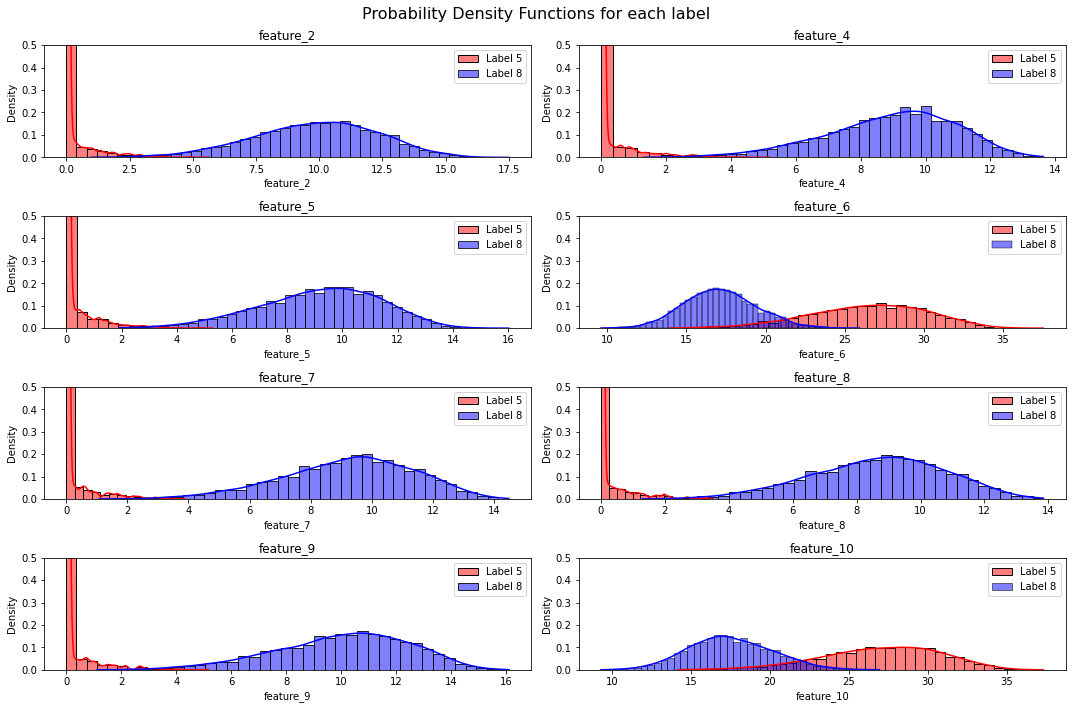

In [55]:
# plotting the pdf for all features for each of the values
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
for i, feature in enumerate(feature_cols):
    row = i // 2
    col = i % 2
    sns.histplot(data=df_5, x=feature, ax=axs[row][col], kde=True, label='Label 5', stat='density', color="red")
    sns.histplot(data=df_8, x=feature, ax=axs[row][col], kde=True, label='Label 8', stat='density', color="blue")
    axs[row][col].set_title(feature)
    axs[row][col].legend()
    axs[row][col].set_ylim(0,0.5)

fig.suptitle('Probability Density Functions for each label', fontsize=16)
plt.tight_layout()
plt.show()

In [56]:
df_5.describe()

,label,feature_2,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
count,4499.0,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,5.0,0.112121,0.087831,0.119272,26.472535,0.076358,0.065979,0.100173,27.058922
std,0.0,0.458518,0.389433,0.452542,3.705828,0.349368,0.311302,0.437932,3.753686
min,5.0,0.000000,0.000000,0.000000,13.957437,0.000000,0.000000,0.000000,14.139824
25%,5.0,0.000000,0.000000,0.000000,24.018396,0.000000,0.000000,0.000000,24.561806
50%,5.0,0.000000,0.000000,0.000000,26.701290,0.000000,0.000000,0.000000,27.330477
75%,5.0,0.000000,0.000000,0.000000,29.198128,0.000000,0.000000,0.000000,29.823492
max,5.0,5.619933,5.191311,5.289932,37.554253,3.876642,3.463840,5.164404,37.330738


In [57]:
#define function to find best distribution for each feature
#based off of code from this stackoverflow post: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

import scipy.stats as stats

def find_best_dist(feature_vals):
    dist_names = ['beta',
                  'chi2',
                  'expon',
                  'gamma',
                  'norm',
                  't']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(feature_vals)
        params[dist_name] = param
        
        D, p = stats.kstest(feature_vals, dist_name, args=param)
        print('p value for {}: {}'.format(dist_name, p))
        dist_results.append((dist_name, p))
        
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    
    print('Best fitting distribution: {}'.format(best_dist))
    print('Best p value: {}'.format(best_p))
    print('Parameters for best fit: {}'.format(params[best_dist]))
    
    return best_dist, best_p, params[best_dist]

In [12]:
#collect best fitting distributions for each feature and category

feature_distributions_5 = {}
feature_distributions_8 = {}

valid_feature_nums = [2,4,5,6,7,8,9,10]

for feature_num in valid_feature_nums:
    best_dist_5, best_p_5, params_5 = find_best_dist(df_5['feature_'+str(feature_num)])
    feature_distributions_5['feature_'+str(feature_num)] = (best_dist_5, params_5)
    
    best_dist_8, best_p_8, params_8 = find_best_dist(df_8['feature_'+str(feature_num)])
    feature_distributions_8['feature_'+str(feature_num)] = (best_dist_8, params_8)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p value for beta: 0.0
p value for chi2: 0.0
p value for expon: 0.0
p value for gamma: 0.0
p value for norm: 0.0
p value for t: 0.0
Best fitting distribution: beta
Best p value: 0.0
Parameters for best fit: (0.11776839045890578, 149.74182795203535, -2.186219826674158e-25, 13.293787100220843)
p value for beta: 0.9872605247049905
p value for chi2: 6.981715602966385e-07
p value for expon: 0.0
p value for gamma: 0.00016660913372433682
p value for norm: 0.002769218802690166
p value for t: 0.0027601166550205694
Best fitting distribution: beta
Best p value: 0.9872605247049905
Parameters for best fit: (14.821670613196302, 7.86665989995932, -6.550395691165864, 25.11405852884259)
p value for beta: 0.0
p value for chi2: 0.0
p value for expon: 0.0
p value for gamma: 0.0
p value for norm: 0.0
p value for t: 0.0
Best fitting distribution: beta
Best p value: 0.0
Parameters for best fit: (0.2711632488092937, 465.4069516854168, -1.928413426685931e-26, 25.764003196808677)
p value for beta: 0.518345476580

In [13]:
feature_distributions_5

{'feature_2': ('beta',
  (0.11776839045890578,
   149.74182795203535,
   -2.186219826674158e-25,
   13.293787100220843)),
 'feature_4': ('beta',
  (0.2711632488092937,
   465.4069516854168,
   -1.928413426685931e-26,
   25.764003196808677)),
 'feature_5': ('beta',
  (0.21602060508177978,
   625.918439600516,
   -4.8466346394266585e-26,
   49.46829100097167)),
 'feature_6': ('beta',
  (14.256280670273213,
   6.9058459231954,
   1.4546109554020226,
   37.135419839346206)),
 'feature_7': ('beta',
  (0.4894176208554678,
   528.8948875881285,
   -8.432597378635565e-30,
   27.729951939576868)),
 'feature_8': ('beta',
  (0.11519992942043017,
   197.06722892055205,
   -4.692324490715444e-28,
   9.02517108799017)),
 'feature_9': ('beta',
  (0.3018378051146521,
   204.95938188638956,
   -5.830462692881626e-28,
   14.121254271955308)),
 'feature_10': ('beta',
  (14.752993151276618,
   6.344337461684533,
   0.19547176413440231,
   38.414647855420824))}

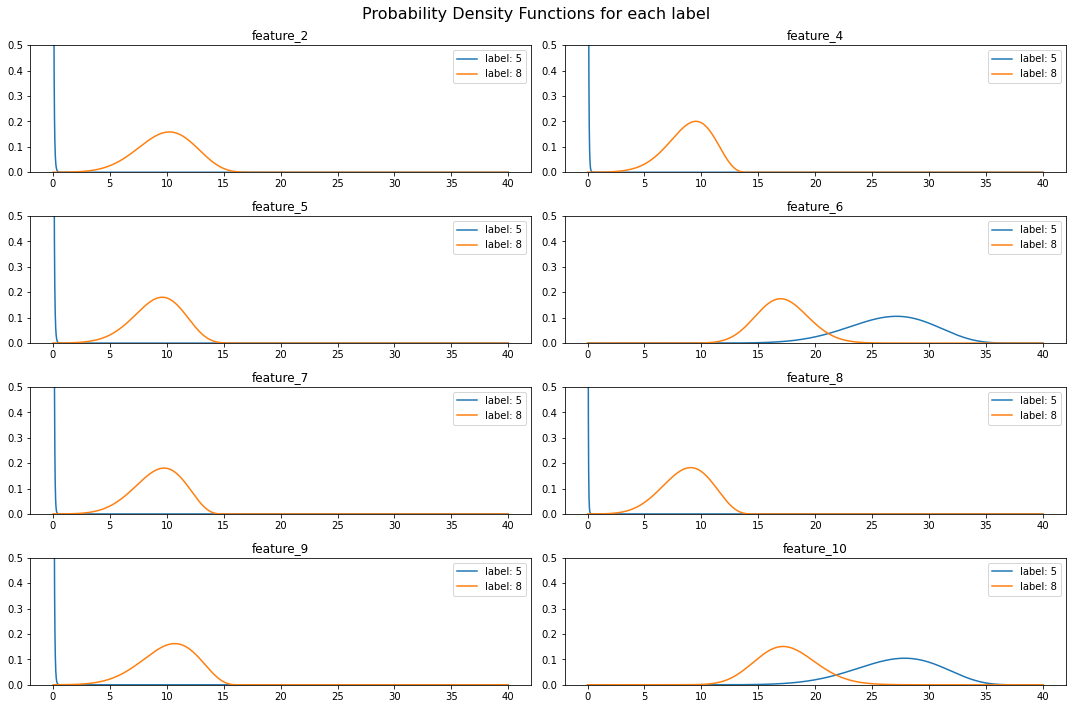

In [14]:
#plot estimated distributions to confirm they approximate actual distributions plotted earlier

x = np.linspace(0,40,5000)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

for i, feature in enumerate(feature_cols):
    row = i // 2
    col = i % 2
    
    params_5 = feature_distributions_5[feature][1]
    if feature_distributions_5[feature][0] == 'beta':
        pdf_5 = stats.beta.pdf(x, params_5[0], params_5[1], params_5[2], params_5[3])
        axs[row][col].plot(x, pdf_5, label='label: 5')
    if feature_distributions_5[feature][0] == 'chi2':
        pdf_5 = stats.chi2.pdf(x, params_5[0], params_5[1], params_5[2])
        axs[row][col].plot(x, pdf_5, label='label: 5')
    
    params_8 = feature_distributions_8[feature][1]
    if feature_distributions_8[feature][0] == 'beta':
        pdf_8 = stats.beta.pdf(x, params_8[0], params_8[1], params_8[2], params_8[3])
        axs[row][col].plot(x, pdf_8, label='label: 8')
    if feature_distributions_8[feature][0] == 'chi2':
        pdf_8 = stats.chi2.pdf(x, params_8[0], params_8[1], params_8[2])
        axs[row][col].plot(x, pdf_8, label='label: 8')
    #sns.histplot(data=df_5, x=feature, ax=axs[row][col], kde=True, label='Label 5', stat='density', color="red")
    #sns.histplot(data=df_8, x=feature, ax=axs[row][col], kde=True, label='Label 8', stat='density', color="blue")
    axs[row][col].set_title(feature)
    axs[row][col].set_ylim(0,0.5)
    axs[row][col].legend()

fig.suptitle('Probability Density Functions for each label', fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
#save best fitting distributions and parameters to csv

feature_dists_5_df = pd.DataFrame(feature_distributions_5).T
feature_dists_5_df['label'] = 5

feature_dists_8_df = pd.DataFrame(feature_distributions_8).T
feature_dists_8_df['label'] = 8

feature_dists_df = pd.concat([feature_dists_5_df, feature_dists_8_df])
feature_dists_df = feature_dists_df.reset_index()
feature_dists_df = feature_dists_df.rename(columns={'index':'feature',
                                                    0:'distribution_type', 
                                                    1:'params'})

feature_dists_df.to_csv('feature_dists_df.csv')

feature_dists_df

,feature,distribution_type,params,label
0,feature_2,beta,"(0.11776839045890578, 149.74182795203535, -2.1...",5
1,feature_4,beta,"(0.2711632488092937, 465.4069516854168, -1.928...",5
2,feature_5,beta,"(0.21602060508177978, 625.918439600516, -4.846...",5
3,feature_6,beta,"(14.256280670273213, 6.9058459231954, 1.454610...",5
4,feature_7,beta,"(0.4894176208554678, 528.8948875881285, -8.432...",5
5,feature_8,beta,"(0.11519992942043017, 197.06722892055205, -4.6...",5
6,feature_9,beta,"(0.3018378051146521, 204.95938188638956, -5.83...",5
7,feature_10,beta,"(14.752993151276618, 6.344337461684533, 0.1954...",5
8,feature_2,beta,"(14.821670613196302, 7.86665989995932, -6.5503...",8
9,feature_4,beta,"(16.236326591296894, 5.212638487058973, -7.674...",8


In [58]:
new_df = df[["label", "feature_6"]]

In [59]:
new_df.head()

,label,feature_6
0,8,19.745337
1,8,18.715256
2,5,28.648830
3,5,26.991035
4,8,22.266983


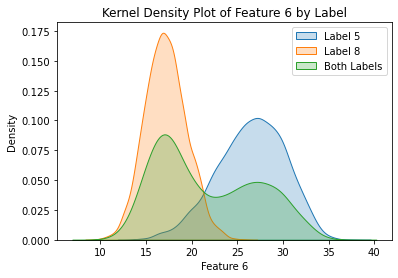

In [61]:
sns.kdeplot(new_df[new_df["label"] == 5]["feature_6"], shade=True, label="Label 5")
sns.kdeplot(new_df[new_df["label"] == 8]["feature_6"], shade=True, label="Label 8")

# plot the kernel density plot for feature_6, without grouping by label
sns.kdeplot(new_df["feature_6"], shade=True, label="Both Labels")

plt.xlabel("Feature 6")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Feature 6 by Label")
plt.legend()
plt.show()

In [37]:
new_df.shape

(9370, 2)

<AxesSubplot:xlabel='feature_6', ylabel='Density'>

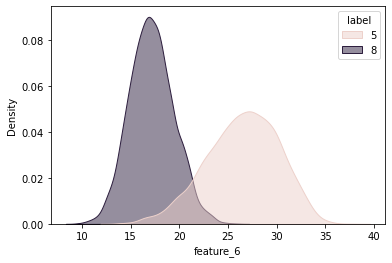

In [20]:
sns.kdeplot(data=new_df, x="feature_6", hue="label", fill=True, alpha=.5)

In [64]:
grouped = new_df.groupby("feature_6").mean().reset_index()
grouped.rename(columns={"label": "expected_label"}, inplace=True)

In [65]:
grouped.head()

,feature_6,expected_label
0,9.597055,8.0
1,9.844283,8.0
2,10.124958,8.0
3,10.283100,8.0
4,10.424763,8.0


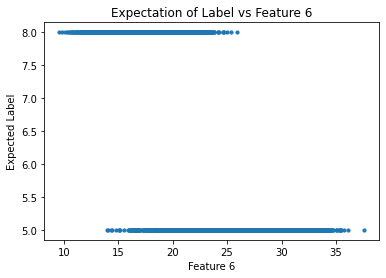

In [66]:
plt.scatter(grouped["feature_6"], grouped["expected_label"], s=10)
plt.xlabel("Feature 6")
plt.ylabel("Expected Label")
plt.title("Expectation of Label vs Feature 6")
plt.show()

In [67]:
mapping_df = new_df.groupby("feature_6")["label"].value_counts(normalize=True).unstack().fillna(0)

In [68]:
mapping_df.head()

label,5,8
feature_6,,
9.597055,0.0,1.0
9.844283,0.0,1.0
10.124958,0.0,1.0
10.283100,0.0,1.0
10.424763,0.0,1.0


<AxesSubplot:xlabel='label', ylabel='feature_6'>

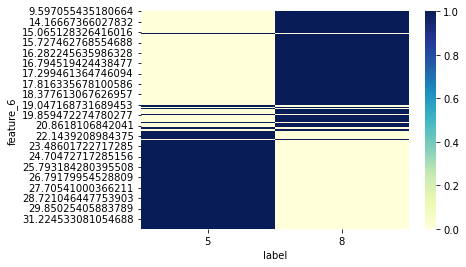

In [69]:
sns.heatmap(mapping_df, cmap="YlGnBu")

In [72]:
mapping_df["expectation_value"] = mapping_df[5] * 5 + mapping_df[8] * 8

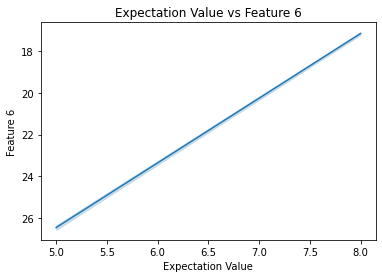

In [74]:
sns.lineplot(data=mapping_df, x="expectation_value", y=mapping_df.index)
plt.xlabel("Expectation Value")
plt.ylabel("Feature 6")
plt.title("Expectation Value vs Feature 6")

plt.gca().invert_yaxis()